**Predictive Analyssi of Global Warming**

**Group Members**

**Sufian Ahmad**

**Hassan Saud**

**Ommair Ahmad**

**Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,GlobalMaxPooling1D , LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_percentage_error


In [2]:
np.random.seed(42)
tf.random.set_seed(42)

**Data Frame # 01 : It consist of anomalies of temperature for every country from 1961 to 2022 Source:(https://climatedata.imf.org/datasets/4063314923d74187be9596f10d034914/explore)**

In [3]:
df=pd.read_csv("temperature.csv")

# Data Preprocessing

In [4]:
df.head(5)

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [5]:
df.columns

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1961', 'F1962',
       'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
       'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
       'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
       'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
       'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019', 'F2020', 'F2021', 'F2022'],
      dtype='object')

In [6]:
df.drop(['ObjectId','ISO2', 'Indicator', 'Unit', 'Source','CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor'],axis=1,inplace=True)
df.columns = df.columns.str.replace("F", " ", regex=True)

In [7]:
df.head(5)

,Country,ISO3,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Afghanistan, Islamic Rep. of",AFG,-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,Albania,ALB,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,Algeria,DZA,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,American Samoa,ASM,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,"Andorra, Principality of",AND,0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [8]:
df.isna().sum()

Country     0
ISO3        0
 1961      37
 1962      36
 1963      37
           ..
 2018      12
 2019      12
 2020      13
 2021      12
 2022      12
Length: 64, dtype: int64

In [9]:
df.fillna(0,inplace=True)

In [10]:
df.isna().sum()

Country    0
ISO3       0
 1961      0
 1962      0
 1963      0
          ..
 2018      0
 2019      0
 2020      0
 2021      0
 2022      0
Length: 64, dtype: int64

# Exploratory Data Analysis

In [11]:
df.describe()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,225.00000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,...,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,0.13624,-0.011320,-0.005049,-0.058538,-0.206404,0.090031,-0.094084,-0.169022,0.133373,0.077689,...,0.893951,1.070222,1.218982,1.362747,1.218169,1.232667,1.366098,1.462364,1.271876,1.308400
std,0.37504,0.313182,0.353921,0.283803,0.263841,0.351435,0.315181,0.258850,0.289160,0.324327,...,0.364300,0.595173,0.516915,0.507294,0.473529,0.650431,0.558986,0.704322,0.560254,0.721674
min,-0.69400,-0.908000,-1.270000,-0.877000,-1.064000,-1.801000,-1.048000,-1.634000,-0.900000,-1.288000,...,0.000000,-0.092000,-0.430000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.425000,-1.305000
25%,-0.06700,-0.145000,-0.165000,-0.213000,-0.362000,-0.007000,-0.252000,-0.287000,0.000000,-0.021000,...,0.707000,0.704000,0.970000,1.097000,0.967000,0.823000,1.078000,1.128000,0.952000,0.834000
50%,0.00000,-0.024000,0.000000,0.000000,-0.193000,0.051000,-0.106000,-0.140000,0.149000,0.074000,...,0.885000,0.960000,1.201000,1.411000,1.257000,1.101000,1.396000,1.430000,1.300000,1.268000
75%,0.25100,0.081000,0.172000,0.097000,0.000000,0.237000,0.000000,0.000000,0.303000,0.248000,...,1.182000,1.306000,1.516000,1.692000,1.512000,1.609000,1.675000,1.778000,1.596000,1.865000
max,1.89200,0.998000,1.202000,1.097000,0.857000,1.151000,1.134000,0.476000,0.939000,0.978000,...,1.643000,2.704000,2.613000,2.459000,2.493000,2.772000,2.689000,3.691000,2.676000,3.243000


In [12]:
fig = px.box(df[df.columns[2:]])
#plt.savefig("abc.png")
#files.download("abc.png")
fig.show()

In [13]:
new_df=df.columns[2:]
by_year=df[new_df].T
country_means=[]
for (columnName, columnData) in by_year.iteritems():
  country_means.append(columnData.mean())
means_df=pd.DataFrame(list(zip(df["Country"], country_means)),columns =['country', 'mean'])


<ipython-input-13-2245655ad37b>:4: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



**Average of temperature anomalies correspond to every country from 1961 to 2022**

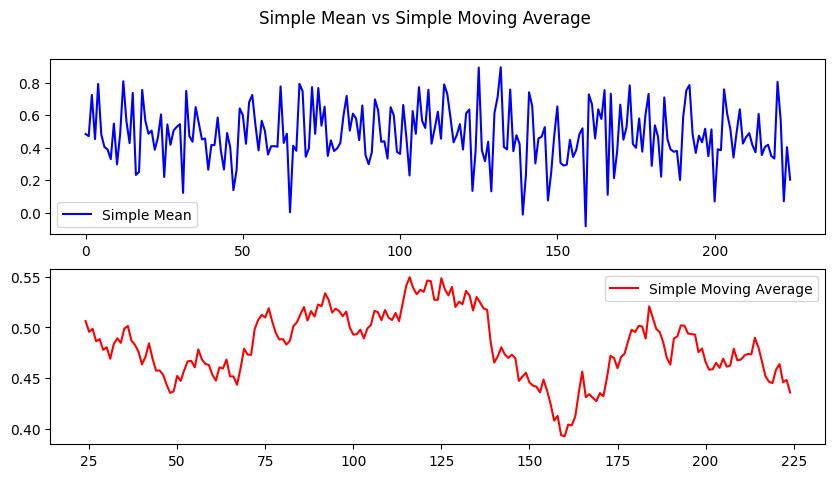

In [14]:
fig, axs = plt.subplots(2,figsize=(10, 5))
fig.suptitle('Simple Mean vs Simple Moving Average')
axs[0].plot(means_df["mean"],color='blue', label="Simple Mean")
axs[1].plot(means_df['mean'].rolling(25).mean(),color='red', label="Simple Moving Average")
axs[0].legend(loc='best')
axs[1].legend(loc='best')
#plt.savefig("abc.png")
#files.download("abc.png")


**Top 10 Countries where highest anomalie is obsered from 1961 to 2022**

In [15]:
o1=means_df.sort_values(by=['mean'], ascending=False).head(10)
h_bar = px.bar(x=o1["mean"],
               y=o1["country"],
               orientation='h',
               color=o1["mean"],
               color_continuous_scale='Viridis',
               title='Top 10 Countries where higher anomalies is observed from 1961 to 2022')

h_bar.update_layout(xaxis_title='Temperature',
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()
#plt.savefig("abc.png")
#files.download("abc.png")

**The Temperature anomalies analysis from 2000 to 2022**

In [16]:
over_20_count=df.columns[41:]
over_20_country=df[over_20_count].T
over_20_means=[]
for (columnName, columnData) in over_20_country.iteritems():
  over_20_means.append(columnData.mean())
over_20_means_df=pd.DataFrame(list(zip(df["Country"], over_20_means)),columns =['country', 'mean'])
o2=over_20_means_df.sort_values(by=['mean'], ascending=False).head(10)
h_bar = px.bar(x=o2["mean"],
               y=o2["country"],
               orientation='h',
               color=o2["mean"],
               color_continuous_scale='Viridis',
               title='Top 10 Countries where higher difference is observed from 2000 to 2022')

h_bar.update_layout(xaxis_title='Temperature',
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()


<ipython-input-16-b5835854c3da>:4: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [17]:
fig = px.box(over_20_means_df[over_20_means_df.columns[1:]])
fig.show()


**Bird Eye View**

In [18]:
fig = go.Figure(data=go.Choropleth(
    locations = df['ISO3'],
    z = over_20_means_df['mean'],
    text = over_20_means_df['country'],
    colorscale = 'Reds',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Anomalies',
))

fig.update_layout(
    title_text='Globally Temperature Anomalies',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: NASA Global Temperature Dataset',
        showarrow = False
    )]
)

fig.show()

**Data Frame #02 : Monthly recorded Temperature anomalies from 1880 to Oct 2023 Source: (https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.txt)**

In [19]:
df2=pd.read_csv("global_nasa.csv")


In [20]:
df2.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1880,-0.19,-0.25,-0.09,-0.16,-0.10,-0.21,-0.18,-0.10,-0.14,-0.23,-0.21,-0.18
1,1881,-0.20,-0.14,0.03,0.05,0.06,-0.19,0.00,-0.04,-0.16,-0.22,-0.19,-0.07
2,1882,0.16,0.14,0.04,-0.17,-0.15,-0.23,-0.16,-0.07,-0.14,-0.24,-0.17,-0.36
3,1883,-0.29,-0.36,-0.13,-0.18,-0.18,-0.07,-0.08,-0.15,-0.22,-0.12,-0.24,-0.12
4,1884,-0.13,-0.09,-0.37,-0.40,-0.34,-0.35,-0.31,-0.29,-0.27,-0.25,-0.34,-0.31


In [21]:
df2.isna().sum()

Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
dtype: int64

In [22]:
df2[df2.columns[1:]].describe()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.064097,0.070903,0.088194,0.063264,0.052153,0.039722,0.063958,0.061597,0.068542,0.093264,0.076597,0.051319
std,0.420756,0.425247,0.431672,0.394437,0.376506,0.374829,0.357159,0.373537,0.374616,0.380003,0.372155,0.389079
min,-0.800000,-0.620000,-0.630000,-0.580000,-0.550000,-0.520000,-0.500000,-0.540000,-0.570000,-0.570000,-0.570000,-0.800000
25%,-0.240000,-0.232500,-0.222500,-0.242500,-0.242500,-0.250000,-0.190000,-0.220000,-0.190000,-0.192500,-0.170000,-0.202500
50%,-0.015000,-0.035000,0.010000,-0.020000,-0.040000,-0.050000,-0.030000,-0.045000,-0.055000,0.010000,0.010000,-0.040000
75%,0.310000,0.382500,0.320000,0.282500,0.272500,0.262500,0.252500,0.252500,0.250000,0.260000,0.230000,0.295000
max,1.170000,1.360000,1.350000,1.130000,1.010000,1.070000,1.180000,1.190000,1.470000,1.340000,1.100000,1.160000


In [23]:
corr_matrix=df2[df2.columns[1:]].corr()

**Correlation Between the Months anomalies**

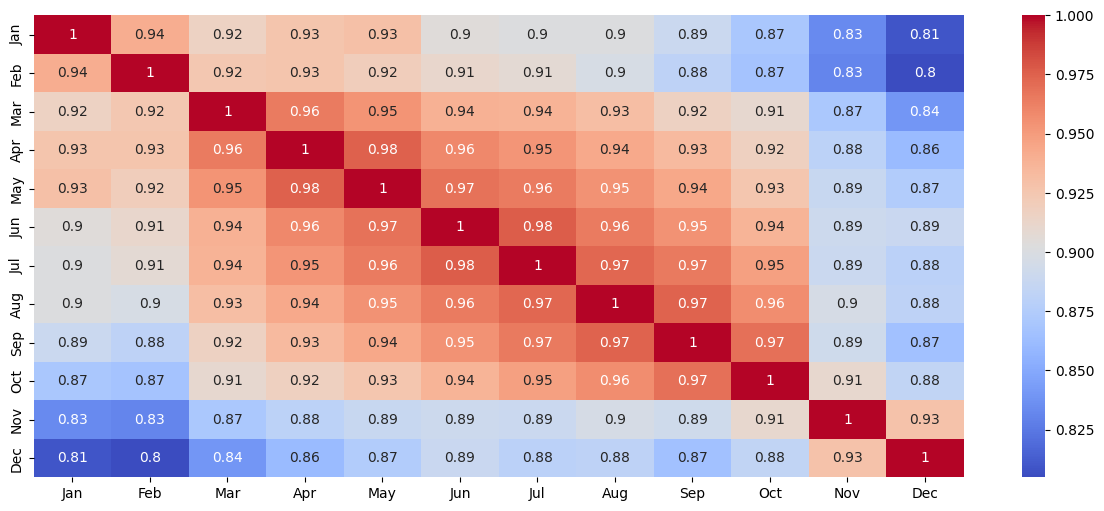

In [24]:
plt.figure(figsize = (15,6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()



In [25]:
fig = px.box(df2[df2.columns[1:]])
fig.show()

Text(0.5, 1.0, 'Dec')

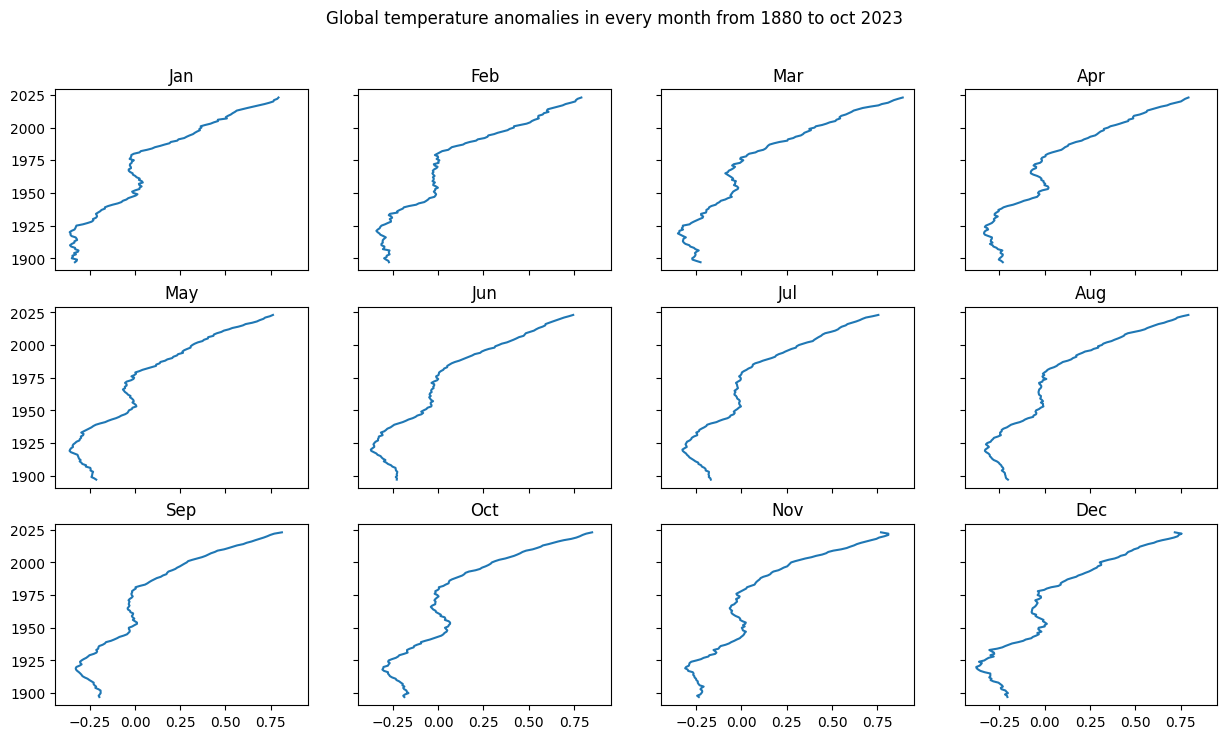

In [26]:
fig, axs = plt.subplots(3, 4,sharey=True,figsize=(15,8),sharex=True)
fig.suptitle('Global temperature anomalies in every month from 1880 to oct 2023 ')
axs[0, 0].plot(df2["Jan"].rolling(18).mean(),df2["Year"])
axs[0, 0].set_title("Jan")
axs[0, 1].plot(df2["Feb"].rolling(18).mean(),df2["Year"])
axs[0, 1].set_title("Feb")
axs[0, 2].plot(df2["Mar"].rolling(18).mean(),df2["Year"])
axs[0, 2].set_title("Mar")
axs[0, 3].plot(df2["Apr"].rolling(18).mean(),df2["Year"])
axs[0, 3].set_title("Apr")
axs[1, 0].plot(df2["May"].rolling(18).mean(),df2["Year"])
axs[1, 0].set_title("May")
axs[1, 1].plot(df2["Jun"].rolling(18).mean(),df2["Year"])
axs[1, 1].set_title("Jun")
axs[1, 2].plot(df2["Jul"].rolling(18).mean(),df2["Year"])
axs[1, 2].set_title("Jul")
axs[1, 3].plot(df2["Aug"].rolling(18).mean(),df2["Year"])
axs[1, 3].set_title("Aug")
axs[2, 0].plot(df2["Sep"].rolling(18).mean(),df2["Year"])
axs[2, 0].set_title("Sep")
axs[2, 1].plot(df2["Oct"].rolling(18).mean(),df2["Year"])
axs[2, 1].set_title("Oct")
axs[2, 2].plot(df2["Nov"].rolling(18).mean(),df2["Year"])
axs[2, 2].set_title("Nov")
axs[2, 3].plot(df2["Dec"].rolling(18).mean(),df2["Year"])
axs[2, 3].set_title("Dec")



**Data Frame #03 : Globally Temperature Anomalies from 1880 to oct 2023**

In [27]:
df3=pd.read_csv("new.csv")

In [28]:
df3.head()

,Year,No_Smoothing
0,1880,-0.17
1,1881,-0.09
2,1882,-0.11
3,1883,-0.18
4,1884,-0.29


In [29]:
df3.isna().sum()

Year            0
No_Smoothing    0
dtype: int64

In [30]:
df3.dtypes

Year              int64
No_Smoothing    float64
dtype: object

In [31]:
df3.shape

(143, 2)

In [32]:
df3.describe()

,Year,No_Smoothing
count,143.00000,143.000000
mean,1951.00000,0.059790
std,41.42463,0.367081
min,1880.00000,-0.480000
25%,1915.50000,-0.200000
50%,1951.00000,-0.060000
75%,1986.50000,0.265000
max,2022.00000,1.010000


In [33]:
fig = px.box(df3[["No_Smoothing"]])
fig.show()

**Comparison Between Features**

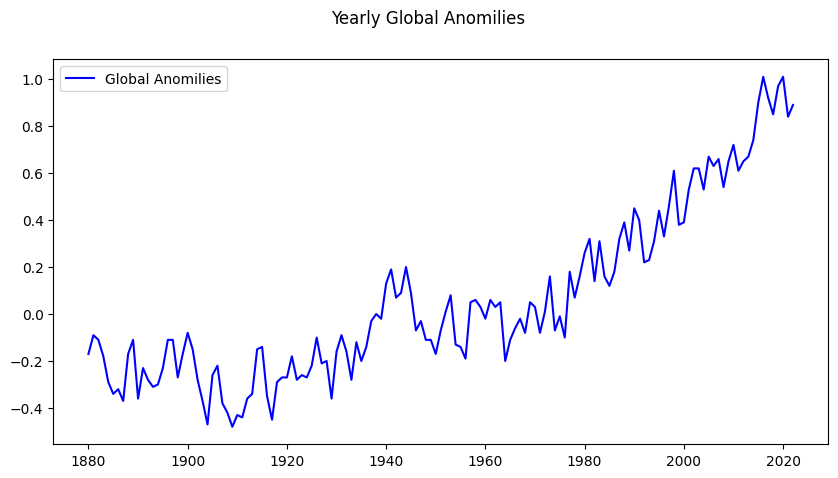

In [34]:
fig, axs = plt.subplots(figsize=(10, 5))
fig.suptitle('Yearly Global Anomilies')
axs.plot(df3["Year"],df3["No_Smoothing"],color='blue', label="Global Anomilies")
axs.legend(loc='best')


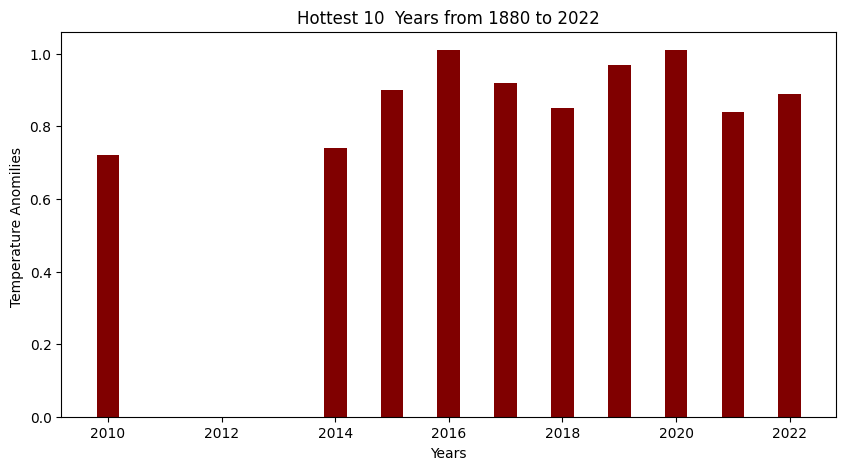

,Year,No_Smoothing
140,2020,1.01
136,2016,1.01
139,2019,0.97
137,2017,0.92
135,2015,0.90
142,2022,0.89
138,2018,0.85
141,2021,0.84
134,2014,0.74
130,2010,0.72


In [35]:
t10=df3.sort_values(by=['No_Smoothing'], ascending=False).head(10)
fig = plt.figure(figsize = (10, 5))
plt.bar(t10["Year"], t10["No_Smoothing"], color ='maroon',width = 0.4)
plt.xlabel("Years")
plt.ylabel("Temperature Anomilies ")
plt.title("Hottest 10  Years from 1880 to 2022")
plt.show()
t10


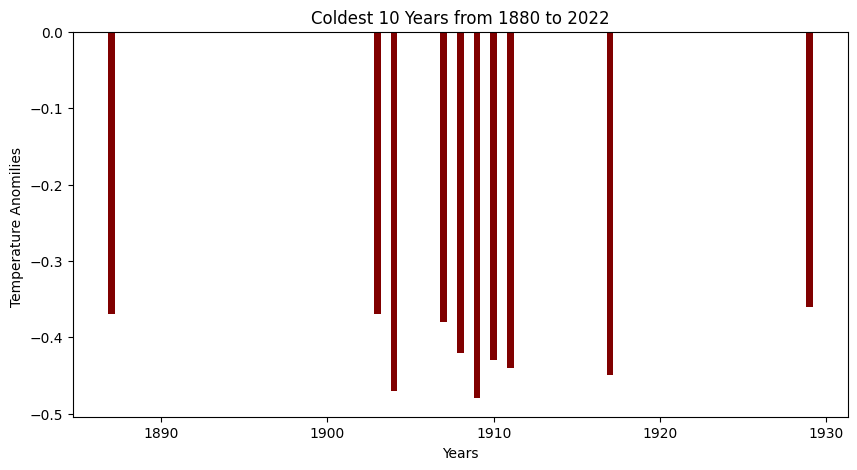

,Year,No_Smoothing
29,1909,-0.48
24,1904,-0.47
37,1917,-0.45
31,1911,-0.44
30,1910,-0.43
28,1908,-0.42
27,1907,-0.38
23,1903,-0.37
7,1887,-0.37
49,1929,-0.36


In [36]:
t10N=df3.sort_values(by=['No_Smoothing']).head(10)
fig = plt.figure(figsize = (10, 5))
plt.bar(t10N["Year"], t10N["No_Smoothing"], color ='maroon',width = 0.4)
plt.xlabel("Years")
plt.ylabel("Temperature Anomilies ")
plt.title("Coldest 10 Years from 1880 to 2022")
plt.show()
t10N


our data is not smooth therefore, Lowess technique of statistics is applied to make the data smooth which will helps the machine learning models to learn and optimize better

**Lowess Technique**

In [37]:
global_temperature= df3.set_index("Year")

In [38]:
lowess = sm.nonparametric.lowess

## note, default frac=2/3
temp_lowess = lowess(endog=global_temperature["No_Smoothing"], exog=global_temperature.index)
## convert to pd.Series with datatimeindex for easy plotting
temp_lowess = pd.Series(temp_lowess[:, 1], index=global_temperature.index)


## frac = 0.01
temp_lowess_1 = lowess(endog=global_temperature["No_Smoothing"], exog=global_temperature.index, frac=0.01)
temp_lowess_1 = pd.Series(temp_lowess_1[:, 1], index=global_temperature.index)

## frac = 0.1
temp_lowess_2 = lowess(endog=global_temperature["No_Smoothing"], exog=global_temperature.index, frac=0.1)
temp_lowe_series=pd.Series(temp_lowess_2[:, 1])
temp_lowess_2 = pd.Series(temp_lowess_2[:, 1], index=global_temperature.index)

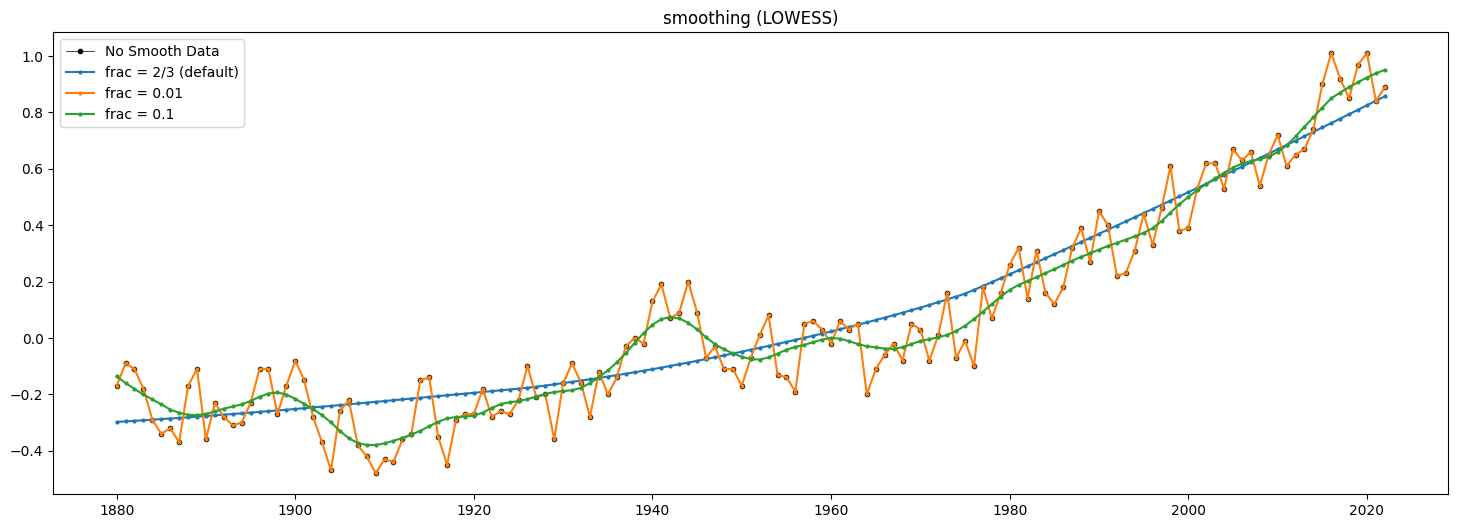

In [86]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(
    global_temperature,
    marker=".",
    linestyle="-",
    linewidth=0.5,
    label="No Smooth Data",
    color="black",
)
ax.plot(
    temp_lowess,
    marker="o",
    markersize=2,
    linestyle="-",
    label="frac = 2/3 (default)",
)
ax.plot(
    temp_lowess_1,
    marker="o",
    markersize=2,
    linestyle="-",
    label="frac = 0.01",
)
ax.plot(
    temp_lowess_2,
    marker="o",
    markersize=2,
    linestyle="-",
    label="frac = 0.1",
)
ax.set_title("smoothing (LOWESS)")
ax.legend()
plt.show()

By using the frac=0.1, the data is now smooth. Now we make changes in our original data frame

In [40]:
df3["Lowess"]=temp_lowe_series

In [41]:
df3.head()

,Year,No_Smoothing,Lowess
0,1880,-0.17,-0.136539
1,1881,-0.09,-0.159594
2,1882,-0.11,-0.181019
3,1883,-0.18,-0.200503
4,1884,-0.29,-0.218256


**Correlation Matrix**

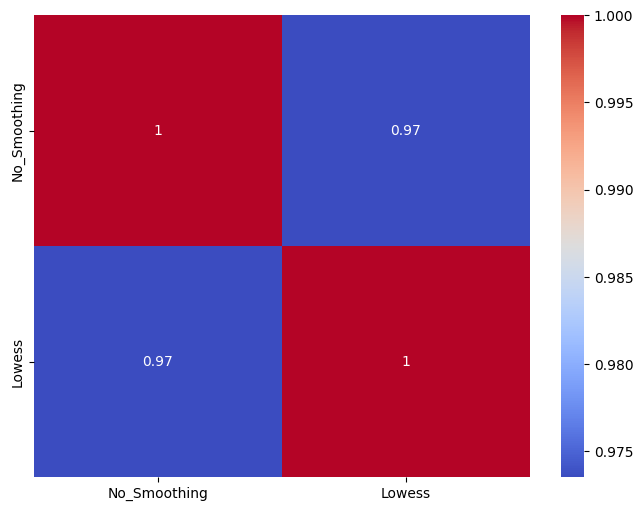

In [42]:
corr_matrix=df3[["No_Smoothing","Lowess"]].corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

**Machine Learning Models**

In [43]:
mse_of_models={}
r2_scores={}
forecast_future={}
mape_scores={}

**ARIMA Model**

In [44]:
ndata=df3[["Lowess"]]
ndata["Lowess"]=ndata["Lowess"].shift(1)
ndata.dropna(inplace=True)
Ntest=10
train=ndata["Lowess"].iloc[:-Ntest]
test=ndata["Lowess"].iloc[-Ntest:]
def plot_fit_forecast(result,d,col="Lowess"):
  fig,ax=plt.subplots(figsize=(10,5))
  ax.plot(ndata["Lowess"],label="Lowess")
  #Plot the fitted curve
  train_pred=result.predict(start=train.index[d],end=train.index[-1])
  ax.plot(train.index[d:],train_pred,color='green',label='fitted')

  #forecast the test results
  prediction_result=result.forecast(Ntest)
  ax.plot(test.index,prediction_result,label='forecast')
  ax.legend()
  forecast_10=result.forecast(20)
  values_10_years=forecast_10[10:]
  forecast_future["Arima"]=np.array(values_10_years)
  mse_Arima = mean_squared_error(test, prediction_result)
  print("mse_ARIMA : ",mse_Arima)
  r2_arima=r2_score(test,prediction_result)
  print("r2score",r2_arima)
  mse_of_models["Arima"]=mse_Arima
  r2_scores["Arima"]=r2_arima
  mape_arima=mean_absolute_percentage_error(test, prediction_result)
  print("Mean Absolute Percentage Error is",mape_arima)
  mape_scores["Arima"]=mape_arima



<ipython-input-44-a1b2be5b0571>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-a1b2be5b0571>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index i

mse_ARIMA :  0.00024258560026988872
r2score 0.9536662110468996
Mean Absolute Percentage Error is 0.013788509059101377


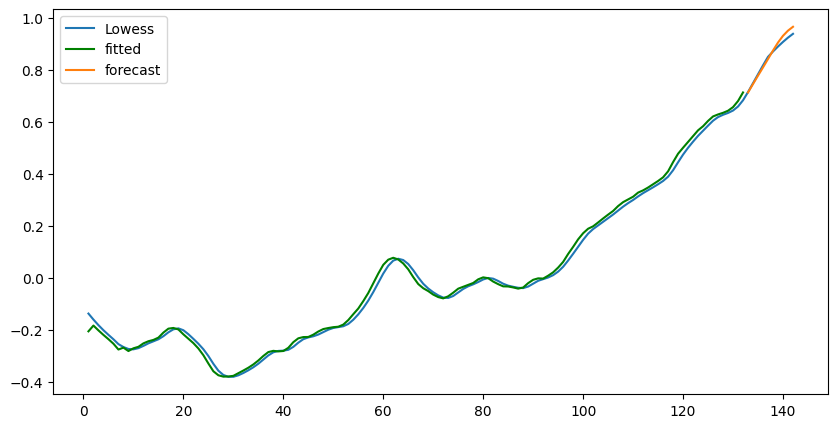

In [45]:
arima=ARIMA(train,order=(20,2,1))
arima_result_1011=arima.fit()
plot_fit_forecast(arima_result_1011,0,col="Lowess")

**Converting Data into Supervised Learning Format**

In [46]:
#Make Supervised DataSet
series=df3["Lowess"].to_numpy()[1:]
T=10
X=[]
Y=[]
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)
X=np.array(X).reshape(-1,T)
Y=np.array(Y)
Xtrain,Ytrain=X[:-Ntest],Y[:-Ntest]
Xtest,Ytest=X[-Ntest:],Y[-Ntest:]

In [47]:
#For Plotting the Fitted Curved
train_idx=df3.index <= train.index[-1]
test_idx=~train_idx
#Lag=10 So first 10 rows cannot be fitted
train_idx[:T+1]=False


In [48]:
#Defining Function for fitting and prediction of models
def one_step_and_multistep_forecast(model,name):
  model.fit(Xtrain,Ytrain)
  print("One-Step forecast",name)
  df3.loc[train_idx,f'{name}_1step_train']=model.predict(Xtrain)
  df3.loc[test_idx,f'{name}_1step_test']=model.predict(Xtest)
  #multistep
  multistep_prediction=[]
  last_x=Xtest[0]
  while (len(multistep_prediction) < Ntest):
    p=model.predict(last_x.reshape(1,-1))[0]
    multistep_prediction.append(p)
    last_x=np.roll(last_x,-1)
    last_x[-1]=p
  #store_multi_step
  df3.loc[test_idx,f'{name}_multistep_test']=np.cumsum(multistep_prediction)
  #MSE of multip step
  mse_1step = mean_squared_error(Ytest,df3.loc[test_idx,f'{name}_1step_test'])
  print(f'{name} mse 1-step : ',mse_1step)
  r2_score_models=r2_score(Ytest,df3.loc[test_idx,f'{name}_1step_test'])
  print("r2score",r2_score_models)
  mse_multistep = mean_squared_error(Ytest,df3.loc[test_idx,f'{name}_multistep_test'])
  print(f'{name} mse multi-step : ',mse_multistep)
  mse_of_models[f"{name}"]=mse_1step
  r2_scores[f"{name}"]=r2_score_models
  mape_models=mean_absolute_percentage_error(Ytest,df3.loc[test_idx,f'{name}_1step_test'])
  print("Mean Absolute Percentage Error is",mape_models)
  mape_scores[f"{name}"]=mape_models

  #plot 1-step and multistep
  cols=[
      'Lowess',
      f'{name}_1step_train',
      f'{name}_1step_test',
  ]
  df3[cols].plot(figsize=(10,5));
  #out of sample forecasting
  if name=='Linear_Regression':
    series_new=df3["No_Smoothing"].to_numpy()
    T=10
    X_new=[]
    for t1 in range(len(series_new)-T):
      x=series_new[t1:t1+T]
      X_new.append(x)
    X_new=np.array(X_new).reshape(-1,T)
    Xnext=X_new[-Ntest:]
    years = range(2024, 2034)
    pred_10 = model.predict(Xnext)
    forecast_future["Linear_Regression"]=pred_10




**Linear Regression**

One-Step forecast Linear_Regression
Linear_Regression mse 1-step :  6.35395588616223e-05
r2score 0.9846235821493518
Linear_Regression mse multi-step :  22.593714893939687
Mean Absolute Percentage Error is 0.006562876880561448


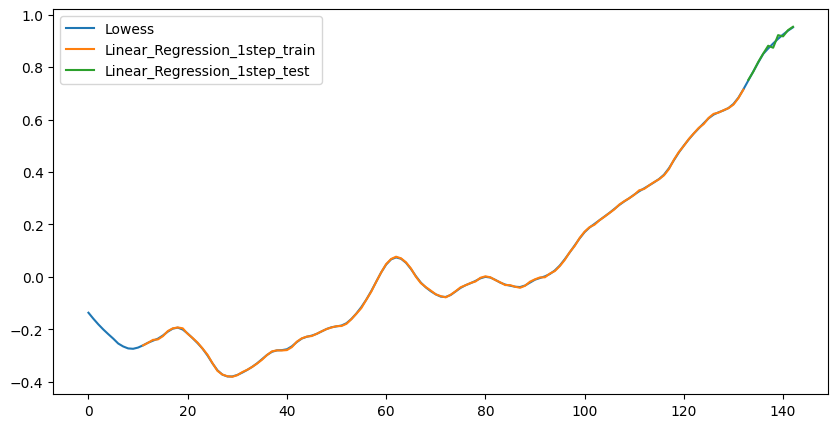

In [49]:
one_step_and_multistep_forecast(LinearRegression(),"Linear_Regression")

**Decision Tree Regressor**

One-Step forecast Decision_Tree
Decision_Tree mse 1-step :  0.027656214881385848
r2score -5.692736364594994
Decision_Tree mse multi-step :  13.342709276330089
Mean Absolute Percentage Error is 0.1719369700798778


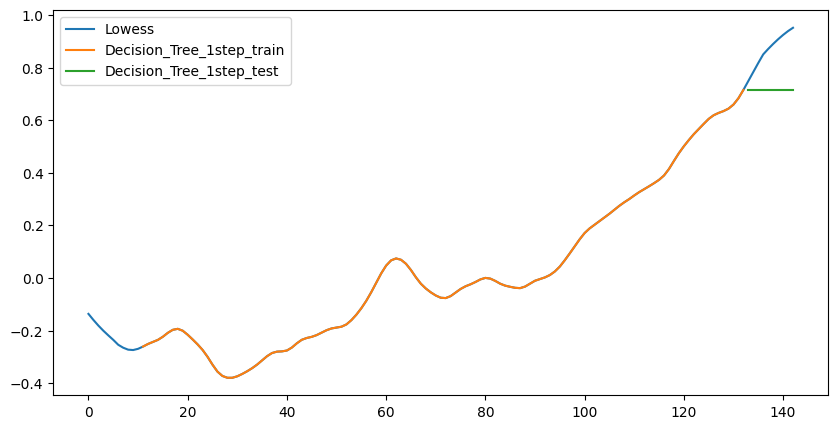

In [50]:
one_step_and_multistep_forecast(DecisionTreeRegressor(),"Decision_Tree")

**Random Forest Regressor**

One-Step forecast Random_Forest
Random_Forest mse 1-step :  0.03298073397758205
r2score -6.981256964103262
Random_Forest mse multi-step :  12.609791489618377
Mean Absolute Percentage Error is 0.19102066373383148


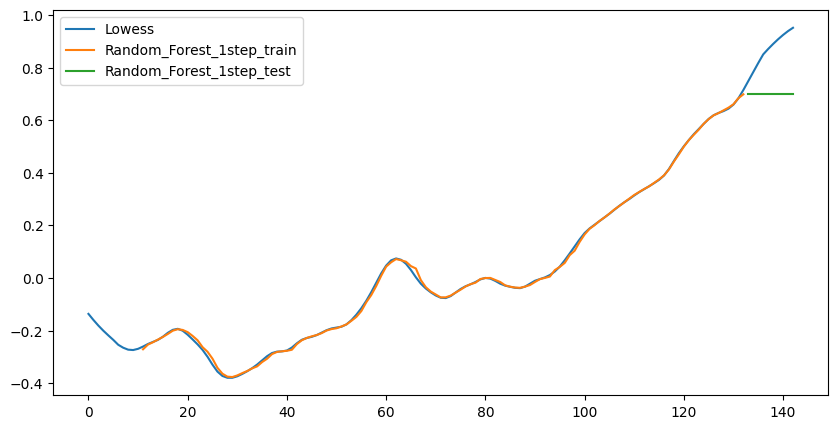

In [51]:
one_step_and_multistep_forecast(RandomForestRegressor(),"Random_Forest")


**XGBoost Regressor**

One-Step forecast Gradient_Boost
Gradient_Boost mse 1-step :  0.02816394956028535
r2score -5.815606915160603
Gradient_Boost mse multi-step :  13.268519932720654
Mean Absolute Percentage Error is 0.17384423972141055


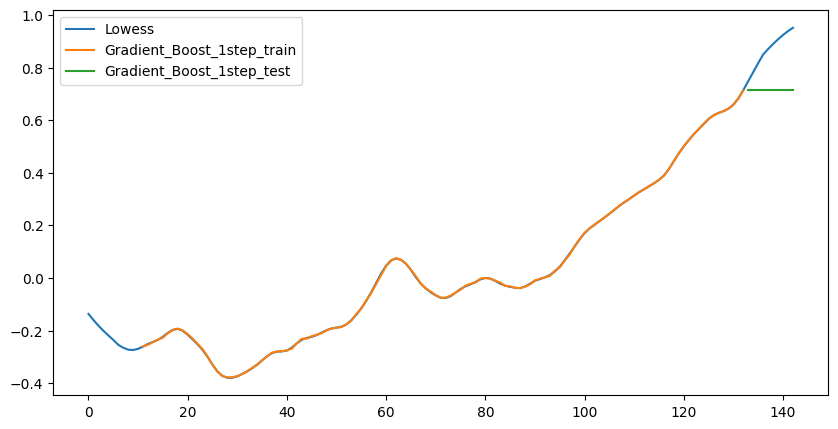

In [52]:
one_step_and_multistep_forecast(GradientBoostingRegressor(),"Gradient_Boost")


**Deep Learning Models**

**CNN**

In [53]:
#Spliiting the dataset with lag=10
T=10
X_c=[]
Y_c=[]
for t in range(len(series)-T):
  x=series[t:t+T]
  X_c.append(x)
  y=series[t+T]
  Y_c.append(y)
X_c=np.array(X).reshape(-1,T,1)
Y_c=np.array(Y)
Xtrain_c,Ytrain_c=X_c[:-Ntest],Y_c[:-Ntest]
Xtest_c,Ytest_c=X_c[-Ntest:],Y_c[-Ntest:]

In [54]:
#Making the Architect
i=Input(shape=(T,1))
x=Conv1D(16,3,activation='relu')(i)
x=MaxPooling1D(2)(x)
x=Conv1D(32,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(1)(x)
model_c=Model(i,x)

In [55]:
model_c.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 8, 16)             64        
                                                                 
 max_pooling1d (MaxPooling1  (None, 4, 16)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 32)             1568      
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)                 33    

In [56]:
model_c.compile(
    loss='mse',
    optimizer='adam',
)

In [57]:
r=model_c.fit(
    Xtrain_c,
    Ytrain_c,
    epochs=150,
    validation_data=(Xtest_c,Ytest_c)
)

Epoch 1/150
4/4 [==============================] - 1s 77ms/step - loss: 0.0806 - val_loss: 0.4400
Epoch 2/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0610 - val_loss: 0.3206
Epoch 3/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0452 - val_loss: 0.2167
Epoch 4/150
4/4 [==============================] - 0s 15ms/step - loss: 0.0332 - val_loss: 0.1308
Epoch 5/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0253 - val_loss: 0.0643
Epoch 6/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0180 - val_loss: 0.0245
Epoch 7/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0135 - val_loss: 0.0053
Epoch 8/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0106 - val_loss: 7.1909e-04
Epoch 9/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0088 - val_loss: 0.0022
Epoch 10/150
4/4 [==============================] - 0s 16ms/step - loss: 0.0076 - val_loss: 0.0040
Epoch 11/150
4/

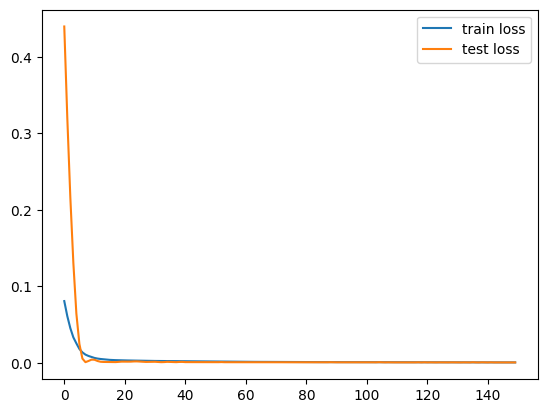

In [58]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='test loss')
plt.legend()

In [59]:
train_idx[:T+1]=False
Ptrain=model_c.predict(Xtrain_c).flatten()
Ptest=model_c.predict(Xtest_c).flatten()

1/1 [==============================] - 0s 23ms/step


In [60]:
df3.loc[train_idx,'Train_Prediction_CNN']=Ptrain
df3.loc[test_idx,'Test_Prediction_CNN']=Ptest

<Axes: >

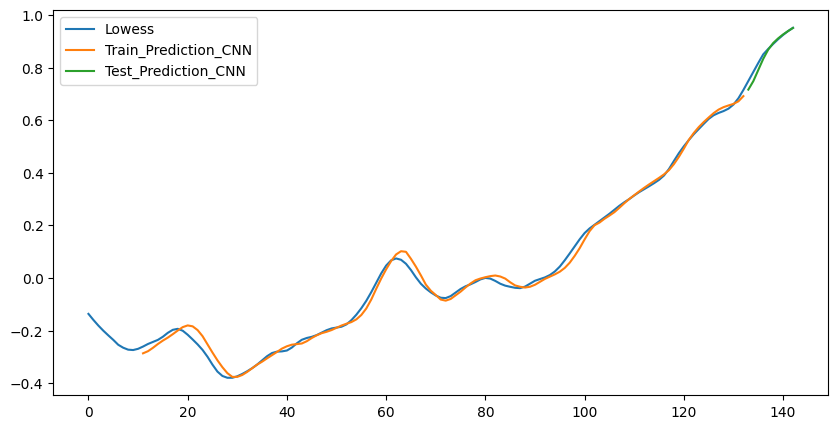

In [61]:
cols=['Lowess','Train_Prediction_CNN','Test_Prediction_CNN']
df3[cols].plot(figsize=(10,5))

In [62]:
multistep_prediction_c=[]
last_x=Xtest[0]
while (len(multistep_prediction_c) < Ntest):
  p=model_c.predict(last_x.reshape(1,-1,1))[0]
  print(p)
  multistep_prediction_c.append(p)
  last_x=np.roll(last_x,-1)
  last_x[-1]=p
  #store_multi_step
df3.loc[test_idx,'CCN_multistep_test']=np.cumsum(multistep_prediction_c)
#df3[["Lowess","Test_Prediction_CNN"]].plot(figsize=(10,5))

1/1 [==============================] - 0s 23ms/step
[0.7162026]
1/1 [==============================] - 0s 21ms/step
[0.73759776]
1/1 [==============================] - 0s 20ms/step
[0.75643957]
1/1 [==============================] - 0s 21ms/step
[0.7700207]
1/1 [==============================] - 0s 20ms/step
[0.78335977]
1/1 [==============================] - 0s 21ms/step
[0.79698175]
1/1 [==============================] - 0s 22ms/step
[0.80730224]
1/1 [==============================] - 0s 21ms/step
[0.8183038]
1/1 [==============================] - 0s 20ms/step
[0.82897043]
1/1 [==============================] - 0s 21ms/step
[0.8377526]


In [63]:
#Calculate the mse
mse_step_c= mean_squared_error(Ytest_c,df3.loc[test_idx,"Test_Prediction_CNN"])
print('mse 1-step: ',mse_step_c)
r2_cnn=r2_score(Ytest_c,df3.loc[test_idx,"Test_Prediction_CNN"])
print("r2 score",r2_cnn)
mse_multistep_c = mean_squared_error(Ytest_c,df3.loc[test_idx,"CCN_multistep_test"])
print('mse multi-step : ',mse_multistep_c)
mse_of_models["CNN"]=mse_step_c
r2_scores["CNN"]=r2_cnn

mape_CNN=mean_absolute_percentage_error(Ytest,df3.loc[test_idx,"Test_Prediction_CNN"])
print("Mean Absolute Percentage Error is",mape_CNN)
mape_scores["CNN"]=mape_CNN

mse 1-step:  0.0003370671086803075
r2 score 0.9184305840387459
mse multi-step :  16.091575983582064
Mean Absolute Percentage Error is 0.015485726926939614


In [64]:
#out of sample forecasting
series_new=df3["No_Smoothing"].to_numpy()
T=10
X_new=[]
for t1 in range(len(series_new)-T):
  x=series_new[t1:t1+T]
  X_new.append(x)
X_new=np.array(X_new).reshape(-1,T,1)
Xnext=X_new[-Ntest:]
years = range(2024, 2034)
pred_10_CNN = model_c.predict(Xnext).flatten()
forecast_future["CNN"]=pred_10_CNN

1/1 [==============================] - 0s 21ms/step


**LSTM**

In [65]:
i=Input(shape=(T,1))
x=LSTM(20)(i)
x=Dense(1)(x)
model_lstm=Model(i,x)

In [66]:
model_lstm.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1781 (6.96 KB)
Trainable params: 1781 (6.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
model_lstm.compile(
    loss='mse',
    optimizer='adam'
)

In [68]:
r2=model_lstm.fit(
    Xtrain_c,
    Ytrain_c,
    epochs=130,
    validation_data=(Xtest_c,Ytest_c)
    )

Epoch 1/130
4/4 [==============================] - 3s 191ms/step - loss: 0.0982 - val_loss: 0.7994
Epoch 2/130
4/4 [==============================] - 0s 15ms/step - loss: 0.0852 - val_loss: 0.6881
Epoch 3/130
4/4 [==============================] - 0s 16ms/step - loss: 0.0735 - val_loss: 0.5956
Epoch 4/130
4/4 [==============================] - 0s 16ms/step - loss: 0.0634 - val_loss: 0.5116
Epoch 5/130
4/4 [==============================] - 0s 16ms/step - loss: 0.0556 - val_loss: 0.4323
Epoch 6/130
4/4 [==============================] - 0s 15ms/step - loss: 0.0469 - val_loss: 0.3658
Epoch 7/130
4/4 [==============================] - 0s 16ms/step - loss: 0.0398 - val_loss: 0.3042
Epoch 8/130
4/4 [==============================] - 0s 16ms/step - loss: 0.0330 - val_loss: 0.2467
Epoch 9/130
4/4 [==============================] - 0s 17ms/step - loss: 0.0271 - val_loss: 0.1942
Epoch 10/130
4/4 [==============================] - 0s 16ms/step - loss: 0.0215 - val_loss: 0.1477
Epoch 11/130
4/4 [

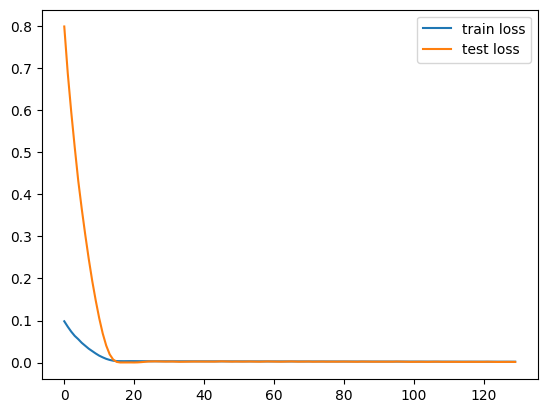

In [69]:
plt.plot(r2.history['loss'],label='train loss')
plt.plot(r2.history['val_loss'],label='test loss')
plt.legend()

1/1 [==============================] - 0s 32ms/step
mse 1-step:  0.0014796063482819285
r2 score 0.6419388822764365
Mean Absolute Percentage Error is 0.042233263422251754


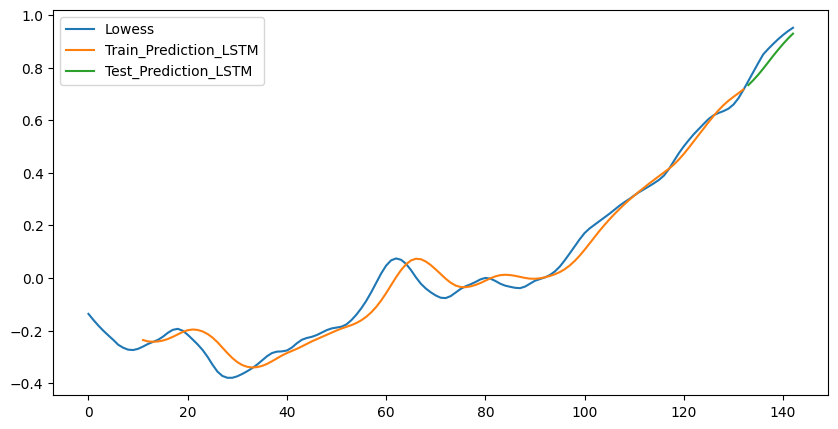

In [70]:
train_idx[:T+1]=False
#testing the model
Ptrain_lstm=model_lstm.predict(Xtrain_c).flatten()
Ptest_lstm=model_lstm.predict(Xtest_c).flatten()
df3.loc[train_idx,'Train_Prediction_LSTM']=Ptrain_lstm
df3.loc[test_idx,'Test_Prediction_LSTM']=Ptest_lstm
cols=['Lowess','Train_Prediction_LSTM','Test_Prediction_LSTM']
df3[cols].plot(figsize=(10,5))
#MSE
mse_step_lstm= mean_squared_error(Ytest_c,df3.loc[test_idx,"Test_Prediction_LSTM"])
print('mse 1-step: ',mse_step_lstm)
r2_lstm=r2_score(Ytest_c,df3.loc[test_idx,"Test_Prediction_LSTM"])
print("r2 score",r2_lstm)
mse_of_models["LSTM"]=mse_step_lstm
r2_scores["LSTM"]=r2_lstm
mape_LSTM=mean_absolute_percentage_error(Ytest,df3.loc[test_idx,"Test_Prediction_LSTM"])
print("Mean Absolute Percentage Error is",mape_LSTM)
mape_scores["LSTM"]=mape_LSTM


In [71]:
#out of sample forecast
pred_10_lstm = model_lstm.predict(Xnext).flatten()
forecast_future["LSTM"]=pred_10_lstm

1/1 [==============================] - 0s 40ms/step


**Comparing MSE of All MODELS**

<Axes: title={'center': 'MSE of Models'}>

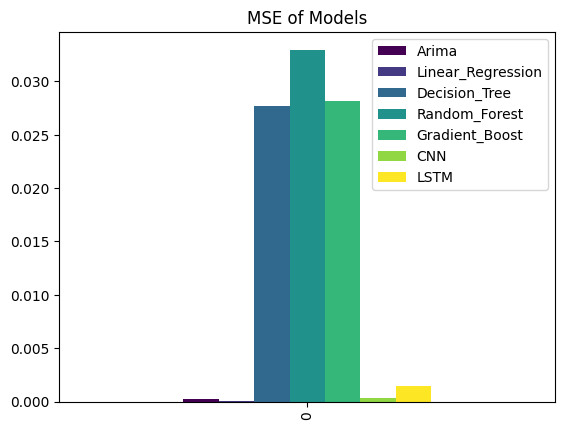

In [72]:
mse_of_models_pd=pd.DataFrame(mse_of_models,index=[0])
mse_of_models_pd.plot(kind='bar', title = 'MSE of Models', colormap = 'viridis')

**Comparison of R2 Score of Models**

In [73]:
r2_score_pd=pd.DataFrame(r2_scores,index=[0])
r2_score_pd.T

,0
Arima,0.953666
Linear_Regression,0.984624
Decision_Tree,-5.692736
Random_Forest,-6.981257
Gradient_Boost,-5.815607
CNN,0.918431
LSTM,0.641939


**Comparison of MAPE of Models**

In [74]:
mape_score_pd=pd.DataFrame(mape_scores,index=[0])
mape_score_pd.T

,0
Arima,0.013789
Linear_Regression,0.006563
Decision_Tree,0.171937
Random_Forest,0.191021
Gradient_Boost,0.173844
CNN,0.015486
LSTM,0.042233


In [75]:
mse_of_models_pd.head()

,Arima,Linear_Regression,Decision_Tree,Random_Forest,Gradient_Boost,CNN,LSTM
0,0.000243,0.000064,0.027656,0.032981,0.028164,0.000337,0.00148


In [76]:
#Lowest MSE
min = [i for i in sorted(mse_of_models, key=mse_of_models.get)][0:4]
mse_of_models_pd[min]


,Linear_Regression,Arima,CNN,LSTM
0,0.000064,0.000243,0.000337,0.00148


In [77]:
#Forecasting from 2024 to 2034 using those models which have lower MSE
index=range(2024,2034)
forecast_pd=pd.DataFrame(forecast_future,index=index)

In [78]:
forecast_pd

,Arima,Linear_Regression,CNN,LSTM
2024,0.978479,1.142744,0.712224,0.720495
2025,0.992308,0.299862,0.694295,0.726798
2026,1.009176,1.085964,0.717253,0.744411
2027,1.029030,1.084228,0.796282,0.777130
2028,1.050689,0.915768,0.890492,0.823540
2029,1.073624,0.696429,1.015157,0.856088
2030,1.098127,1.016413,1.021832,0.879776
2031,1.124802,1.215995,0.999504,0.908011
2032,1.153979,0.721137,1.030300,0.935332
2033,1.184934,0.585560,1.008180,0.945154


<Axes: >

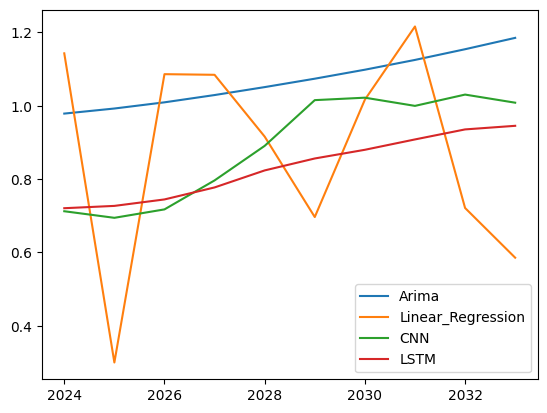

In [79]:
#Plotting the forecast for all models
forecast_pd.plot()

**Mean of all Prediction by models**

In [80]:
forecast_pd["mean"]=forecast_pd.mean(axis=1)

In [81]:
forecast_pd[["mean"]]

,mean
2024,0.888486
2025,0.678316
2026,0.889201
2027,0.921668
2028,0.920122
2029,0.910325
2030,1.004037
2031,1.062078
2032,0.960187
2033,0.930957


<Axes: title={'center': 'Mean Prediction of Models'}>

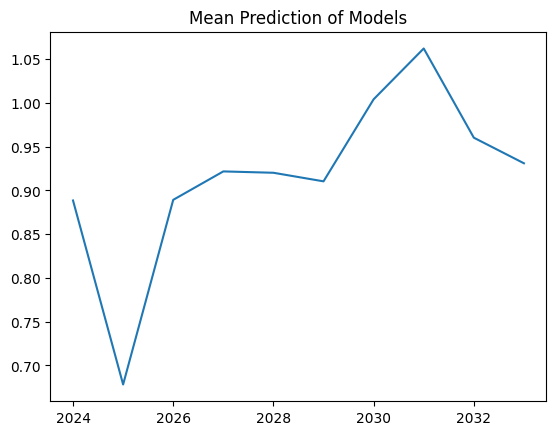

In [82]:
forecast_pd["mean"].plot(title = 'Mean Prediction of Models')

<Axes: title={'center': 'Future Anomilies'}>

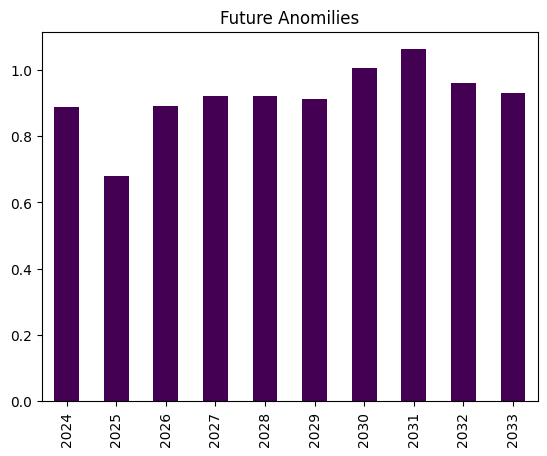

In [83]:
forecast_pd["mean"].plot(kind='bar', title = 'Future Anomilies', colormap = 'viridis')

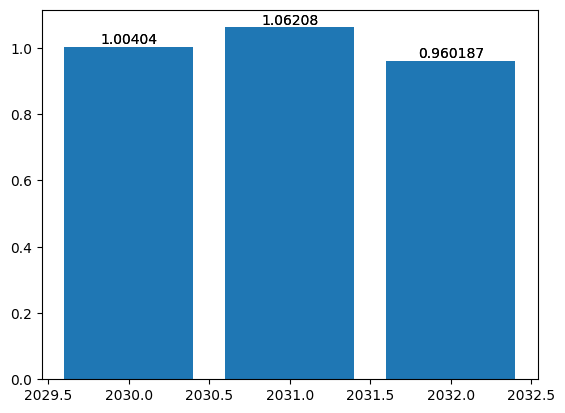

In [84]:
top3=forecast_pd.sort_values(by=['mean'], ascending=False).head(3)
fig, ax = plt.subplots()
bars = ax.bar(top3.index, top3["mean"])
ax.bar_label(bars)
for bars in ax.containers:
    ax.bar_label(bars)

**----------------------------------------------------------------------------**